In [159]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [6]:
import matplotlib
matplotlib.style.use('ggplot')

In [7]:
data = pd.read_csv('titanic_train.csv')

In [10]:
data.shape

(891, 12)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [13]:
data['Age'].fillna(data['Age'].median(),inplace = True)

In [15]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


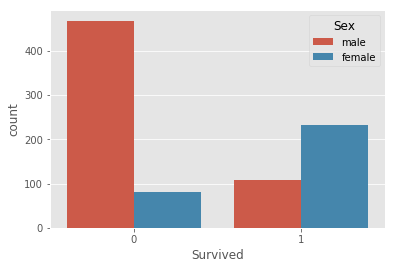

In [17]:
sns.countplot(x = 'Survived' , data=data,hue = 'Sex') #womens are more likely to survive...!!

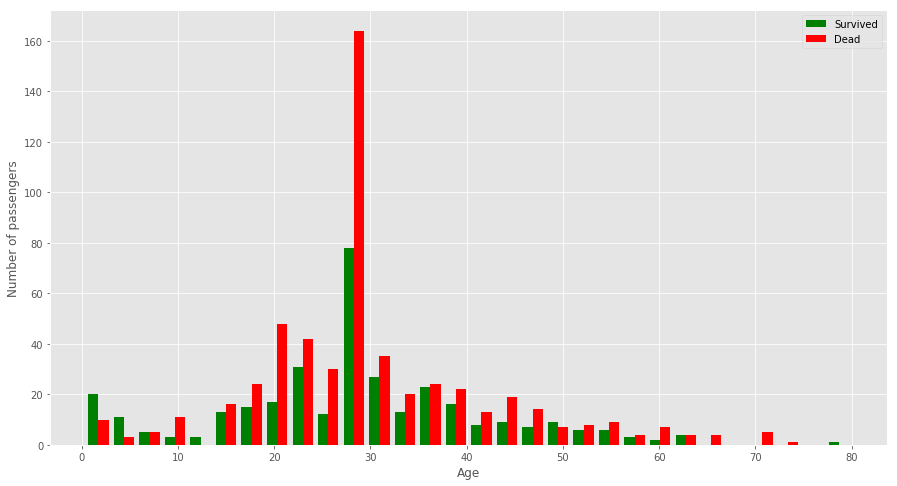

In [26]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Age'], data[data['Survived']==0]['Age']], color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
#it seems that childrens are with age less than 10 are more survived than between age 20 to 50 ... older people are also survived 

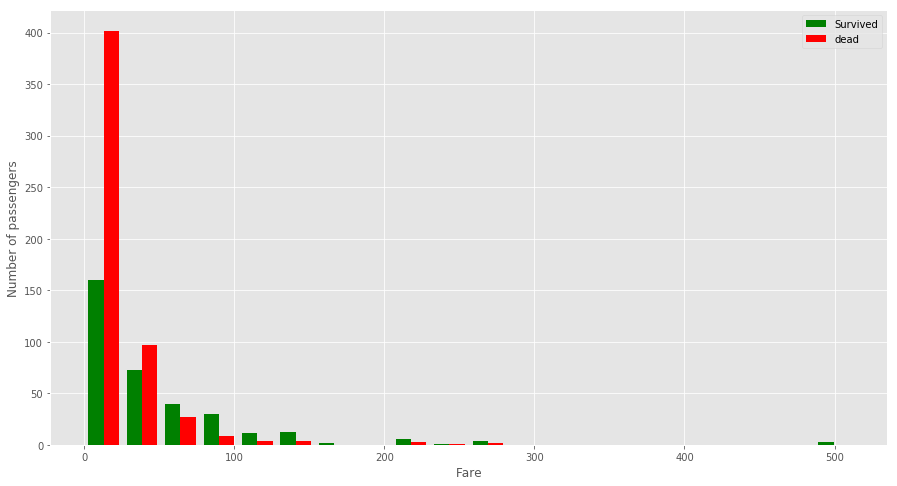

In [28]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']] , color=['g','r'],bins = 20 , label=['Survived','dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()
#it seems that people with high fare survived matlab jinke pass jayada paisa hai matlab acha status hai unlog ka

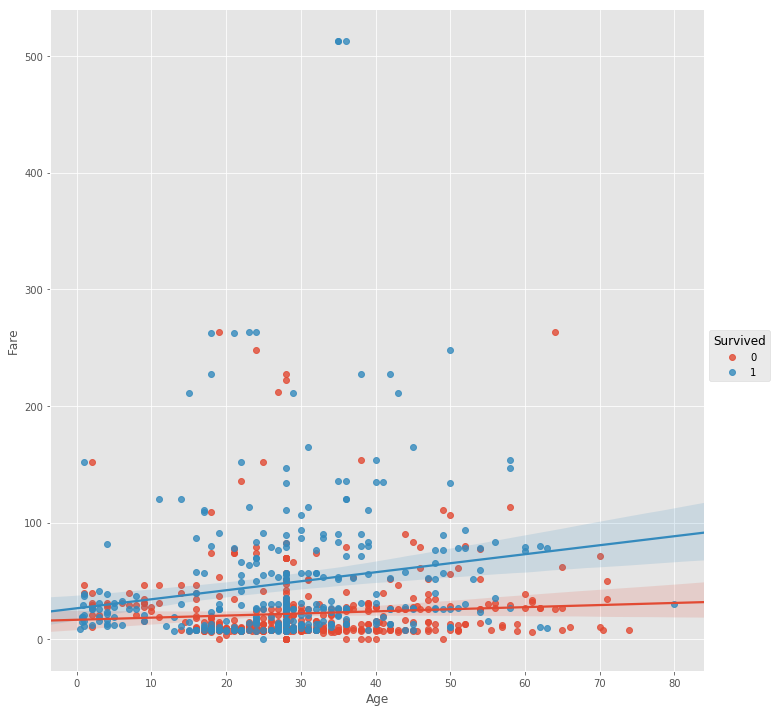

In [42]:
sns.lmplot(x = 'Age' , y = 'Fare' , data=data,hue='Survived',size = 10)
#there is a red cluster around age 20 to 50 and with lower price fare ....!!! hmmm matlab poor people with lower price seat died more

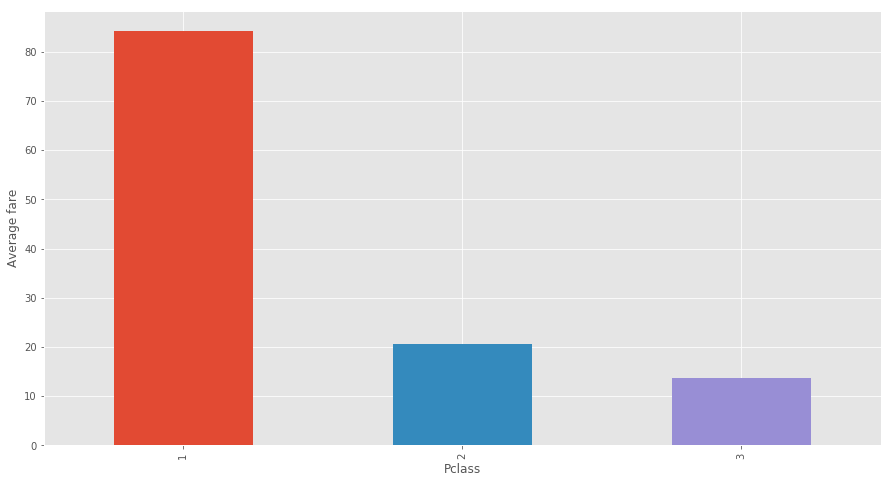

In [43]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(15,8), ax = ax)
# Matlab yes we can see there is a correlation between the fare and Pclass..... 3rd class sasta hai

In [44]:
#lets start feature engineering chalo data clean karte hai ab
def get_combined_data():

    train = pd.read_csv('titanic_train.csv')
 
    test = pd.read_csv('titanic_test.csv')

    targets = train.Survived
    train.drop('Survived', 1, inplace=True)
    

    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index', inplace=True, axis=1)
    
    return combined
#mene dodo data ko merge kar dia test and train ko and target mein train ka survived coloum rakh lia;

In [45]:
combined = get_combined_data()

In [46]:
combined.shape

(1309, 11)

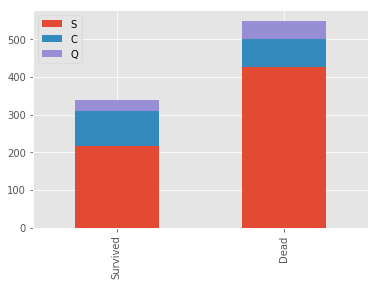

In [67]:
survived_embarked = data[data['Survived']==1]['Embarked'].value_counts()
dead_embarked = data[data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embarked,dead_embarked],index = ['Survived','Dead'])
df.plot(kind = 'bar',stacked = True)

#It seems no correlation here .....!!

In [68]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
#lets work over the Names and title
combined['Name'].apply(lambda name:name.split(',')[1].split('.')[0].strip()).unique()
#combined.head()
#Sabka title nikal lia hai ab insab ko ek title dedeta hu according to there worth maybe :P 
def get_titles():
    
    global combined
    combined['Title'] = combined['Name'].apply(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"
                        }
    combined['Title'] = combined['Title'].map(Title_Dictionary)

    

get_titles()

In [94]:
#now lets process the Age to fill up as we can see almost 12% of Age data is missing....!!
#now we will put the median age according to the Sex,pclass and title because these are more effecting Age.... 
grouped_train_age = combined.head(891).groupby(['Sex','Pclass','Title'])
grouped_train_age_medium = grouped_train_age.median()

In [96]:
grouped_test_age = combined.iloc[891:].groupby(['Sex','Pclass','Title'])
grouped_test_age_medium = grouped_test_age.median()

In [98]:
grouped_train_age_medium

PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass Title                                              
female 1      Miss           369.0  30.0    0.0    0.0   88.25000
              Mrs            499.0  40.0    1.0    0.0   79.20000
              Officer        797.0  49.0    0.0    0.0   25.92920
              Royalty        658.5  40.5    0.5    0.0   63.05000
       2      Miss           437.5  24.0    0.0    0.0   13.00000
              Mrs            439.5  31.5    1.0    0.0   26.00000
       3      Miss           372.0  18.0    0.0    0.0    8.75625
              Mrs            405.5  31.0    1.0    1.0   15.97500
male   1      Master         446.0   4.0    1.0    2.0  120.00000
              Mr             463.0  40.0    0.0    0.0   42.40000
              Officer        648.0  51.0    0.0    0.0   35.50000
              Royalty        600.0  40.0    0.0    0.0   27.72080
       2      Master         408.0   1.0    1.0    1.0   26.00000
              Mr             440.0  31.0    0.0    0.0   13.00000
              Officer        358.5  46.5    0.0    0.0   13.00000
       3      Master         270.5   4.0    3.5    1.0   28.51250
              Mr             472.0  26.0    0.0    0.0    7.89580

In [99]:
grouped_test_age_medium

PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass Title                                              
female 1      Miss          1074.0  32.0    0.0    0.0  158.20835
              Mrs           1076.0  48.0    1.0    0.0   63.35830
              Royalty       1306.0  39.0    0.0    0.0  108.90000
       2      Miss          1121.0  19.5    1.0    1.0   24.50000
              Mrs           1123.5  29.0    0.0    0.0   26.00000
       3      Miss          1090.5  22.0    0.0    0.0    7.87920
              Mrs           1048.0  28.0    1.0    0.5   14.28125
male   1      Master        1022.0   9.5    1.0    2.0  198.43750
              Mr            1102.0  42.0    0.0    0.0   50.24790
              Officer       1094.0  53.0    1.0    0.0   81.85830
       2      Master        1033.5   5.0    0.5    1.5   27.75000
              Mr            1156.0  28.0    0.0    0.0   13.00000
              Officer       1048.5  35.5    0.5    0.5   19.50000
       3      Master        1173.0   7.0    1.0    1.0   15.24580
              Mr            1101.0  25.0    0.0    0.0    7.85420

In [110]:
def process_age():
    
    global combined
    
    # a function that fills the missing values of the Age variable
    
    def fillAges(row, grouped_median):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 1, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 1, 'Mrs']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['female', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['female', 1, 'Royalty']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 2, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 2, 'Mrs']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 3, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 3, 'Mrs']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 1, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 1, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['male', 1, 'Royalty']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 2, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 2, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 2, 'Officer']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 3, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 3, 'Mr']['Age']
    
    combined.head(891).Age = combined.head(891).apply(lambda r : fillAges(r, grouped_train_age_medium) if np.isnan(r['Age']) 
                                                  else r['Age'], axis=1)
    combined.iloc[891:].Age = combined.iloc[891:].apply(lambda r : fillAges(r, grouped_test_age_medium) if np.isnan(r['Age']) 
                                                  else r['Age'], axis=1)
    
process_age()

#Hence finally all the Ages filledup According to the Sex , Pclass and Title 

In [111]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [114]:
#Now lets process Name... also lets make dummy variable for the Title
def process_name():
    
    global combined
    
    combined.drop('Name',axis = 1 , inplace = True)
    
    title_dummies = pd.get_dummies(combined['Title'],prefix='Title')
    combined = pd.concat([combined,title_dummies],axis=1)
    
    combined.drop('Title' , axis = 1 , inplace = True)
    
    
process_name()

In [117]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,4,1,1,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,5,3,0,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


In [116]:
sex_map = {'male':0 , 'female':1}
combined['Sex'] = combined['Sex'].map(sex_map)

In [118]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null int64
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1308 non-null float64
Cabin            295 non-null object
Embarked         1307 non-null object
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
dtypes: float64(2), int64(5), object(3), uint8(6)
memory usage: 110.0+ KB


In [119]:
#it seems like we are missing one row with fare lets fill it up...
def process_fares():
    
    global combined
    combined.head(891).Fare.fillna(combined.head(891).Fare.mean(), inplace=True)
    combined.iloc[891:].Fare.fillna(combined.iloc[891:].Fare.mean(), inplace=True)
    
process_fares()   

In [120]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null int64
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Cabin            295 non-null object
Embarked         1307 non-null object
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
dtypes: float64(2), int64(5), object(3), uint8(6)
memory usage: 110.0+ KB


In [126]:
#we can see two Embarked are NAN lets fill them we can see 'S' is what is frequently used
def process_embarked():
    
    global combined
    combined.head(891).Embarked.fillna('S', inplace=True)
    combined.iloc[891:].Embarked.fillna('S', inplace=True)
    
    
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'],prefix='Embarked')
    combined = pd.concat([combined,embarked_dummies],axis=1)
    combined.drop('Embarked',axis=1,inplace=True)
    
process_embarked()

AttributeError: 'DataFrame' object has no attribute 'Embarked'

In [127]:
#Ab cabin karte hai jo NAN hai usme U -> unknown dal deta hu kyoki koi corellation nahi dekha tha previously
def process_cabin():
    
    global combined
    
    combined.Cabin.fillna('U', inplace=True) # U matlab Unknown
    
    combined['Cabin'] = combined['Cabin'].map(lambda c : c[0])
    
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')
    
    combined = pd.concat([combined,cabin_dummies], axis=1)
    
    combined.drop('Cabin', axis=1, inplace=True)
process_cabin()

AttributeError: 'DataFrame' object has no attribute 'Cabin'

In [128]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 26 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null int64
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Cabin_A          1309 non-null uint8
Cabin_B          1309 non-null uint8
Cabin_C          1309 non-null uint8
Cabin_D          1309 non-null uint8
Cabin_E          1309 non-null uint8
Cabin_F          1309 non-null uint8
Cabin_G          1309 non-null uint8


In [129]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,3,0,22.0,1,0,A/5 21171,7.2500,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,...,1,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,113803,53.1000,0,0,...,1,0,0,1,0,0,0,0,0,0
4,5,3,0,35.0,0,0,373450,8.0500,0,0,...,1,0,0,0,0,0,0,0,0,1


In [130]:
#lets Make pclass also a dummy variable 
def process_pclass():
    
    global combined
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
    
    combined = pd.concat([combined,pclass_dummies],axis=1)
    
    
    combined.drop('Pclass',axis=1,inplace=True)
    
process_pclass()    

In [131]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
PassengerId      1309 non-null int64
Sex              1309 non-null int64
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Cabin_A          1309 non-null uint8
Cabin_B          1309 non-null uint8
Cabin_C          1309 non-null uint8
Cabin_D          1309 non-null uint8
Cabin_E          1309 non-null uint8
Cabin_F          1309 non-null uint8
Cabin_G          1309 non-null uint8
Cabin_T          1309 non-null uint8


In [132]:
combined.shape

(1309, 28)

In [248]:
#Ticket wale coloum mein bhi pblm hai usko bhi dummy variable mein change kar lete hai
def process_ticket():
    
    global combined
    
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = [ t for t in ticket if t.isdigit()]
        if len(ticket) >= 0:
            return ticket[0]
        else: 
            return 'XXX'
    

    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)

process_ticket()    

KeyError: 'Ticket'

In [249]:
combined.shape

(1309, 68)

In [250]:
#processing family
def process_family():
    
    global combined
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1 #yeah family ka total size hai
    
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5<=s else 0)
process_family()

In [251]:
combined.shape

(1309, 68)

In [252]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 68 columns):
PassengerId       1309 non-null int64
Sex               1309 non-null int64
Age               1309 non-null float64
SibSp             1309 non-null int64
Parch             1309 non-null int64
Fare              1309 non-null float64
Title_Master      1309 non-null uint8
Title_Miss        1309 non-null uint8
Title_Mr          1309 non-null uint8
Title_Mrs         1309 non-null uint8
Title_Officer     1309 non-null uint8
Title_Royalty     1309 non-null uint8
Embarked_C        1309 non-null uint8
Embarked_Q        1309 non-null uint8
Embarked_S        1309 non-null uint8
Cabin_A           1309 non-null uint8
Cabin_B           1309 non-null uint8
Cabin_C           1309 non-null uint8
Cabin_D           1309 non-null uint8
Cabin_E           1309 non-null uint8
Cabin_F           1309 non-null uint8
Cabin_G           1309 non-null uint8
Cabin_T           1309 non-null uint8
Cabin_U        

In [253]:
# hsss finally ho gaya pura data cleaning part now lets start Fitting the model..................***********...........

In [254]:
#lets recover the train test and target from the combined Data we cleaned so far
def recover_train_test_target():
    global combined
    
    train0 = pd.read_csv('titanic_train.csv')
    
    targets = train0.Survived
    train = combined.head(891)
    test = combined.iloc[891:]
    
    return train, test, targets

In [255]:
train, test, targets = recover_train_test_target()

In [256]:
# we can see that there are many almost 68 feature jayada bada hai yeah toh lets remove less important feature using Trees 
#feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [257]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

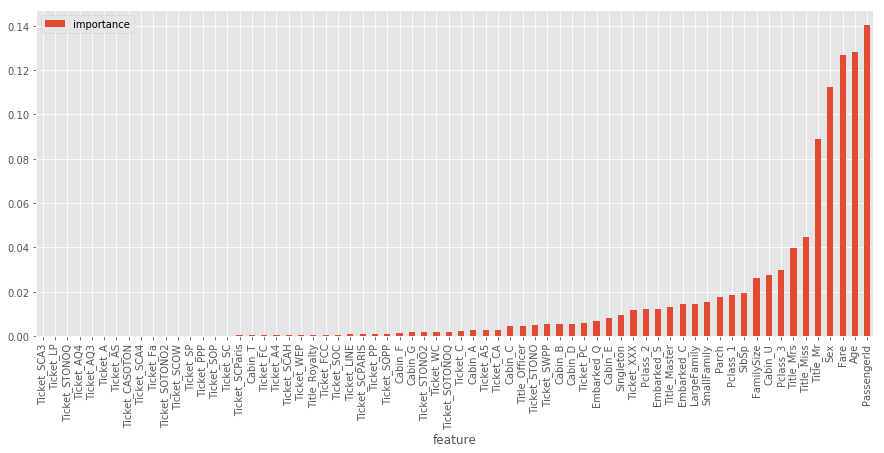

In [258]:
features.plot(kind = 'bar',figsize=(15,6))
#As we can see Passenger ID is quite important coorelation feature.... ANd mr ,mrs title bhi important feature hai nd yes 
#sex,fare ,Age also

In [267]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score

In [268]:
#lets use Five fold cross_validation
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [269]:
#lets make our dataset little smaller dimension  yesss we got only most effective 14 features
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape

(891, 14)

In [270]:
test_reduces = model.transform(test)
test_reduces.shape

(418, 14)

In [296]:
#now lets Run the Gridsearch to Tune our classifier parameter
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [1, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(targets, n_folds=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 3, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

In [297]:
compute_score(model, train, targets, scoring='accuracy')



0.82495571474015583

In [293]:
## wooooooooowwwww 82% Accuracy sahiiiiiiii
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('titanic_test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('submitmodefied.csv',index=False)

In [266]:
dada = pd.read_csv('submitmodefied.csv')

In [247]:
dada

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
